In [ ]:
!pip install cvlib

     |████████████████████████████████| 10.1MB 3.8MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.5-cp36-none-any.whl size=10044206 sha256=8d4339853341a37e732e8f7783d44ca518639e85bf8ac76bc79aeb3f4e56c041
  Stored in directory: /root/.cache/pip/wheels/6a/cb/43/ba188c823836640d8f22ee1f6ff792a0c83a8b66eabf52b219
  Created wheel for progressbar: filename=progressbar-2.5-cp36-none-any.whl size=12076 sha256=ae1a75fea3c77baafb7bfe8396f2934b7706f38f4869fd7cd6f2bf50917fceca
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


In [ ]:
import pickle
import cv2
#import matplotlib.pyplot as plt
import cvlib as cv
#from cvlib.object_detection import draw_bbox
import glob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import  matplotlib.pyplot as  plt



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls '/content/drive/MyDrive/MTP/'

ls: cannot access '/content/drive/MyDrive/MTP/': No such file or directory


In [ ]:
labels = [line.rstrip('\n') for line in open('/content/drive/MyDrive/MTP /UCSD /labels.txt', 'r')]
vectorizer = CountVectorizer()
x1= vectorizer.fit(labels)
x2=vectorizer.transform(labels).toarray()
def getVector(labels):
    t=vectorizer.transform(set(labels)).toarray().sum(axis=0)
    return t


In [ ]:
path= '/content/drive/MyDrive/MTP /UCSD /Train/Train001/'
list_img= glob.glob(path+"*.tif")
total = len(list_img)
print(total)

200


In [ ]:
%%time
frames=[]
label_arr=[]
value_arr=[]

for i in range(total):
    img=cv2.imread(list_img[i])
    frames.append(img)
    bbox, label, conf = cv.detect_common_objects(img)
    t=getVector(label)
#    plt.imshow(img)
#    plt.show()
    if i%10==0:
        print(i)
#         print(i," ---->  ",gmm.score([t]))
#     value_arr.append(gmm.predict([t]))
    label_arr.append(t)

0


KeyboardInterrupt: ignored

In [ ]:
label_arr=np.array(label_arr)
updated_arr=[]
for k in range(0,label_arr.shape[0]-30+1):
    x=np.average(label_arr[k:30+k,:],axis=0)
    updated_arr.append(x)
    

In [ ]:
label_arr.shape

In [ ]:
updated_arr=np.array(updated_arr)

In [ ]:
X_train = np.array(updated_arr)
print("Model is Training.......")
gmm= GaussianMixture(20) 
gmm.fit(X_train)

Test

In [ ]:
path= '/content/drive/MyDrive/MTP /UCSD /Test/Test002/'
list_img= glob.glob(path+"*.tif")
total = len(list_img)
print(total)

200


In [ ]:
%%time
frames=[]
label_arr=[]
value_arr=[]

for i in range(total):
    img=cv2.imread(list_img[i])
    frames.append(img)
    bbox, label, conf = cv.detect_common_objects(img)
    t=getVector(label)
#    plt.imshow(img)
#    plt.show()
    if i%10==0:
        print(i)
#         print(i," ---->  ",gmm.score([t]))
#     value_arr.append(gmm.predict([t]))
    label_arr.append(t)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
CPU times: user 12min 15s, sys: 630 ms, total: 12min 16s
Wall time: 9min


In [ ]:
label_arr=np.array(label_arr)
updated_arr=[]
for k in range(0,label_arr.shape[0]-30+1):
    x=np.average(label_arr[k:30+k,:],axis=0)
    updated_arr.append(gmm.score([x]))

In [ ]:
updated_arr=np.array(updated_arr)
updated_arr.shape

(171,)

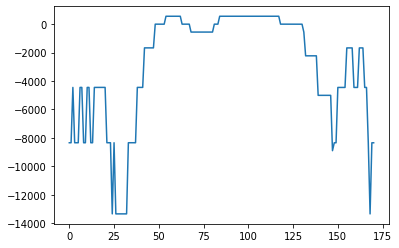

In [ ]:
plt.plot(updated_arr)

In [ ]:
y_test =[]
for i in range(1,172):
    if i in range(80,160):  # specify in the data set 1 for anomaly,0 for normal
        y_test.append(1)
    else:
        y_test.append(0)

In [ ]:
mu  = np.mean(updated_arr)
sigma= np.var(updated_arr)
z_score = updated_arr-mu / sigma

In [ ]:
th = -30000   #threshold 
y_pred= (z_score <th)*1

Area under the Receiver Operating Characteristic curve: 0.5


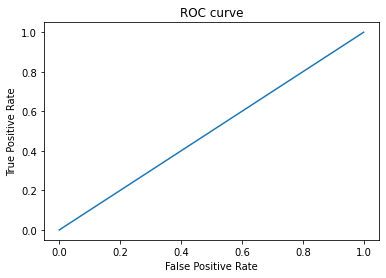

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred))
    


In [ ]:
%%time
img=cv2.imread(list_img[0])
bbox, label, conf = cv.detect_common_objects(img,enable_gpu=True)

CPU times: user 2.34 s, sys: 16 ms, total: 2.36 s
Wall time: 1.3 s


In [ ]:
X_test = np.array(label_arr)

NameError: ignored

Test

In [ ]:
path= '/content/drive/MyDrive/MTP /UCSD /Test/Test001/'
list_img= glob.glob(path+"*.tif")
total = len(list_img)
print(total)

200


In [ ]:
#frames=[]
label_arr=[]
value_arr=[]

for i in range(total):
    img=cv2.imread(list_img[i])
    frames.append(img)
    bbox, label, conf = cv.detect_common_objects(img)
    t=getVector(label)
#    plt.imshow(img)
#    plt.show()
    if i%10==0:
        print(i)
#         print(i," ---->  ",gmm.score([t]))
   # value_arr.append(gmm.predict([t]))
    label_arr.append(t)

0
10
20
30
40
50
60
70
80
90
100
110
120
